In [69]:
# import data from excel spreadsheet
#df = pd.read_excel(r"C:\Users\ticar\Downloads\Remote-work-data.xlsx")

industries = {
    "Mining, logging, construction": [0, 0, 0, 0],
    "Manufacturing": 0,
    "Trade, transportation, and utilities": 0,
    "Information": 0,
    "Financial activities": 0,
    "Professional and business services": 0,
    "Education and health services": 0,
    "Leisure and hospitality": 0,
    "Other services": 0,
    "Government": 0,
},

USIndustryYears = [2000,2005,2010,2015,2019,2020,2021]
UKIndustryYears = [2005,2010,2015,2019,2020,2021]

numUKESployeesByIndustryByCity = {
    "Seattle": {
        "Mining, logging, construction": [101700,104700,83600,107100,127600,129900,109600],
        "Manufacturing": [212800,171300,167000,188200,184300,168400,142200],
        "Trade, transportation, and utilities": [325600,313200,301600,354400,398000,390300,332600],
        "Information": [79500,77700,87700,97500,128400,133700,139000],
        "Financial activities": [101800,106700,92100,95900,101400,100400,87600],
        "Professional and business services": [220500,214400,220700,268600,302100,295700,277500],
        "Education and health services": [183700,198400,231500,251300,283000,272100,223500],
        "Leisure and hospitality": [145800,152500,155700,185200,207800,150600,133000],
        "Other services": [57800,61800,63200,70200,78700,71100,59300],
        "Government": [236000,252100,264200,270300,275500,266000,206700],
    },
    'Omaha': {
        "Mining, logging, construction": [23500,25700,20900,25800,30500,30400,30700],
        "Manufacturing": [35700,32900,31200,32700,33600,33000,33500],
        "Trade, transportation, and utilities": [108100,99700,94100,98200,96100,91800,94100],
        "Information": [15300,13300,11200,11600,10500,9900,9800],
        "Financial activities": [35800,37600,40500,42200,46000,45500,44100],
        "Professional and business services": [60400,61700,63500,73600,73100,70900,71900],
        "Education and health services": [55200,61200,71500,76100,79700,78000,79600],
        "Leisure and hospitality": [41100,42200,43800,48400,52000,43300,47500],
        "Other services": [14400,16400,17800,18300,18600,17700,18300],
        "Government": [55300,59900,65300,65900,66900,65200,65200],
    },
    'Scranton': {
        "Mining, logging, construction": [10700,10600,9400,10200,10500,9800,10300],
        "Manufacturing": [45600,34900,27800,27000,28600,26900,27200],
        "Trade, transportation, and utilities": [55600,58500,58900,62600,63500,61900,63900],
        "Information": [7000,6300,5000,3500,2900,2600,2500],
        "Financial activities": [13700,13400,12400,12600,13100,13000,13000],
        "Professional and business services": [23000,23400,25000,29800,28300,25500,26100],
        "Education and health services": [45300,49100,52200,51900,55200,51500,50500],
        "Leisure and hospitality": [19000,22000,21800,23300,23500,17800,18200],
        "Other services": [10000,10000,8300,8500,8800,7500,7700],
        "Government": [31200,31700,31700,29400,29000,27900,28300],
    },
}

numUSEmployeesByIndustryByCity = {
    "Liverpool": {
        "Mining, logging, construction": [141000,138700,138000,150300,153500,146240],
        "Manufacturing": [80200,73900,80500,100200,107500,103120],
        "Trade, transportation, and utilities": [92000,109100,128300,146900,145800,146100],
        "Information": [59900,68400,66800,72100,73300,73120],
        "Financial activities": [22400,21105,22890,22820,20160,25592],
        "Professional and business services": [41600,39195,42510,42380,37440,47528],
        "Education and health services": [29000,24450,22900,23850,21450,23900],
        "Leisure and hospitality": [69800,59800,66400,64000,69600,69700],
        "Other services": [70400,78700,73800,80200,75000,73120],
        "Government": [29000,24450,22900,23850,21450,26560],
    },
    "Barry (Wales)": {
        "Mining, logging, construction": [4100,3500,4500,4600,3300,4100],
        "Manufacturing": [5700,4300,3500,4900,4800,5700],
        "Trade, transportation, and utilities": [1400,900,1400,800,1200,1400],
        "Information": [4000,4400,3800,3900,3600,4000],
        "Financial activities": [3045,2940,3710,3535,4095,3045],
        "Professional and business services": [5655,5460,6890,6565,7605,5655],
        "Education and health services": [9700,9800,10550,10850,11550,9700],
        "Leisure and hospitality": [9500,10800,11200,13000,8000,9500],
        "Other services": [2400,4000,2800,3700,3100,2400],
        "Government": [9700,9800,10550,10850,11550,9700],
    },
}



# fills in numUKEmployeesByIndustryByCity
#industriesList = list(industries[0].keys())
#for industry in industriesList:
#    df_industry = df[df['Industry'] == industry]

#print(numUKEmployeesByIndustryByCity)

In [70]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

r^2: 0.9650164302266793


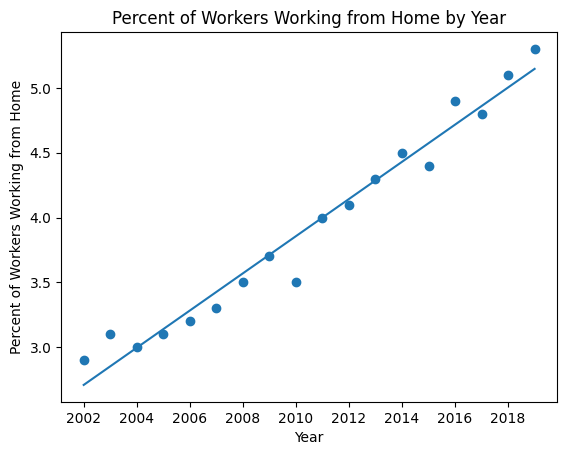

In [71]:
# data
years = np.array([2002,2003,2004,2005,2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
percentWorkersHome = np.array([
    2.90,
    3.10,
    3.00,
    3.10,
    3.20,
    3.30,
    3.50,
    3.70,
    3.50,
    4.00,
    4.10,
    4.30,
    4.50,
    4.40,
    4.90,
    4.80,
    5.10,
    5.30,
])

# plot with linear regression
plt.scatter(years, percentWorkersHome)
plt.xlabel('Year')
plt.ylabel('Percent of Workers Working from Home')
plt.title('Percent of Workers Working from Home by Year')

# adjusts x ticks
plt.xticks(np.arange(2002, 2020, 2))

# plots linear regression
m, b = np.polyfit(years, percentWorkersHome, 1)
plt.plot(years, m*years + b)

# calculates r^2
r2 = r2_score(percentWorkersHome, m*years + b)
print('r^2:', r2)

# extrapolates linear regression to 2027
#extrapolatedYears = np.array([2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027])
#extrapolatedPercentWorkersHome = m*extrapolatedYears + b
#plt.plot(extrapolatedYears, extrapolatedPercentWorkersHome, 'r--')

plt.show()

In [72]:
# import data from excel spreadsheet
#df = pd.read_excel(r"C:\Users\ticar\Downloads\Remote-work-data.xlsx")

industries = {
    "Mining, logging, construction": [0, 0, 0, 0],
    "Manufacturing": 0,
    "Trade, transportation, and utilities": 0,
    "Information": 0,
    "Financial activities": 0,
    "Professional and business services": 0,
    "Education and health services": 0,
    "Leisure and hospitality": 0,
    "Other services": 0,
    "Government": 0,
},

USIndustryYears = np.array([2000,2005,2010,2015,2019,2020,2021])
UKIndustryYears = np.array([2005,2010,2015,2019,2020,2021])

numUSEmployeesByIndustryByCity = {
    "Seattle": {
        "Mining, logging, construction": [101700,104700,83600,107100,127600,129900,109600],
        "Manufacturing": [212800,171300,167000,188200,184300,168400,142200],
        "Trade, transportation, and utilities": [325600,313200,301600,354400,398000,390300,332600],
        "Information": [79500,77700,87700,97500,128400,133700,139000],
        "Financial activities": [101800,106700,92100,95900,101400,100400,87600],
        "Professional and business services": [220500,214400,220700,268600,302100,295700,277500],
        "Education and health services": [183700,198400,231500,251300,283000,272100,223500],
        "Leisure and hospitality": [145800,152500,155700,185200,207800,150600,133000],
        "Other services": [57800,61800,63200,70200,78700,71100,59300],
        "Government": [236000,252100,264200,270300,275500,266000,206700],
    },
    'Omaha': {
        "Mining, logging, construction": [23500,25700,20900,25800,30500,30400,30700],
        "Manufacturing": [35700,32900,31200,32700,33600,33000,33500],
        "Trade, transportation, and utilities": [108100,99700,94100,98200,96100,91800,94100],
        "Information": [15300,13300,11200,11600,10500,9900,9800],
        "Financial activities": [35800,37600,40500,42200,46000,45500,44100],
        "Professional and business services": [60400,61700,63500,73600,73100,70900,71900],
        "Education and health services": [55200,61200,71500,76100,79700,78000,79600],
        "Leisure and hospitality": [41100,42200,43800,48400,52000,43300,47500],
        "Other services": [14400,16400,17800,18300,18600,17700,18300],
        "Government": [55300,59900,65300,65900,66900,65200,65200],
    },
    'Scranton': {
        "Mining, logging, construction": [10700,10600,9400,10200,10500,9800,10300],
        "Manufacturing": [45600,34900,27800,27000,28600,26900,27200],
        "Trade, transportation, and utilities": [55600,58500,58900,62600,63500,61900,63900],
        "Information": [7000,6300,5000,3500,2900,2600,2500],
        "Financial activities": [13700,13400,12400,12600,13100,13000,13000],
        "Professional and business services": [23000,23400,25000,29800,28300,25500,26100],
        "Education and health services": [45300,49100,52200,51900,55200,51500,50500],
        "Leisure and hospitality": [19000,22000,21800,23300,23500,17800,18200],
        "Other services": [10000,10000,8300,8500,8800,7500,7700],
        "Government": [31200,31700,31700,29400,29000,27900,28300],
    },
}

numUKEmployeesByIndustryByCity = {
    "Liverpool": {
        "Mining, logging, construction": [141000,138700,138000,150300,153500,146240],
        "Manufacturing": [80200,73900,80500,100200,107500,103120],
        "Trade, transportation, and utilities": [92000,109100,128300,146900,145800,146100],
        "Information": [59900,68400,66800,72100,73300,73120],
        "Financial activities": [22400,21105,22890,22820,20160,25592],
        "Professional and business services": [41600,39195,42510,42380,37440,47528],
        "Education and health services": [29000,24450,22900,23850,21450,23900],
        "Leisure and hospitality": [69800,59800,66400,64000,69600,69700],
        "Other services": [70400,78700,73800,80200,75000,73120],
        "Government": [29000,24450,22900,23850,21450,26560],
    },
    "Barry (Wales)": {
        "Mining, logging, construction": [4100,3500,4500,4600,3300,4100],
        "Manufacturing": [5700,4300,3500,4900,4800,5700],
        "Trade, transportation, and utilities": [1400,900,1400,800,1200,1400],
        "Information": [4000,4400,3800,3900,3600,4000],
        "Financial activities": [3045,2940,3710,3535,4095,3045],
        "Professional and business services": [5655,5460,6890,6565,7605,5655],
        "Education and health services": [9700,9800,10550,10850,11550,9700],
        "Leisure and hospitality": [9500,10800,11200,13000,8000,9500],
        "Other services": [2400,4000,2800,3700,3100,2400],
        "Government": [9700,9800,10550,10850,11550,9700],
    },
}

# turn all lists into numpy arrays
for city in numUKEmployeesByIndustryByCity:
    for industry in numUKEmployeesByIndustryByCity[city]:
        numUKEmployeesByIndustryByCity[city][industry] = np.array(numUKEmployeesByIndustryByCity[city][industry])

for city in numUSEmployeesByIndustryByCity:
    for industry in numUSEmployeesByIndustryByCity[city]:
        numUSEmployeesByIndustryByCity[city][industry] = np.array(numUSEmployeesByIndustryByCity[city][industry])


r^2: 0.3635540528585455


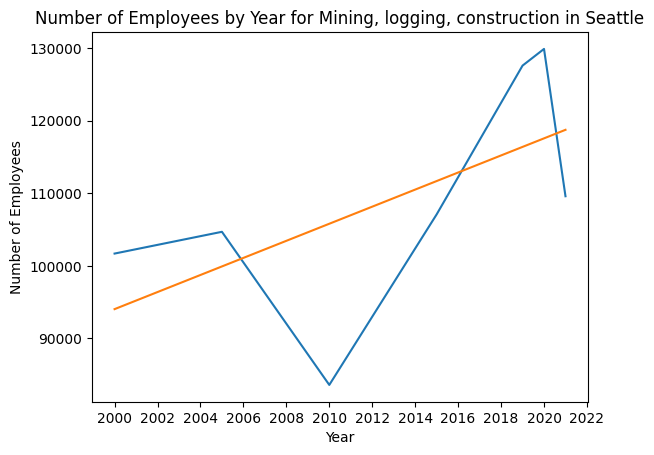

r^2: 0.3871369710060243


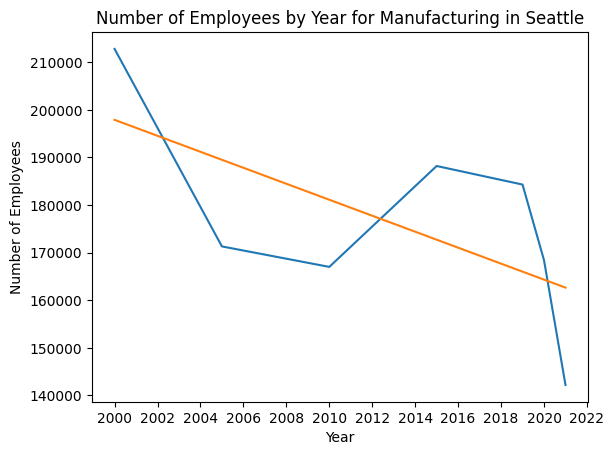

r^2: 0.4294103178643587


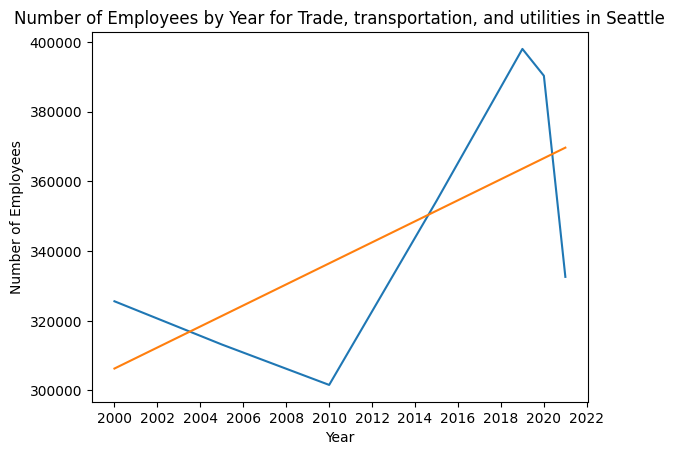

r^2: 0.8563434921262953


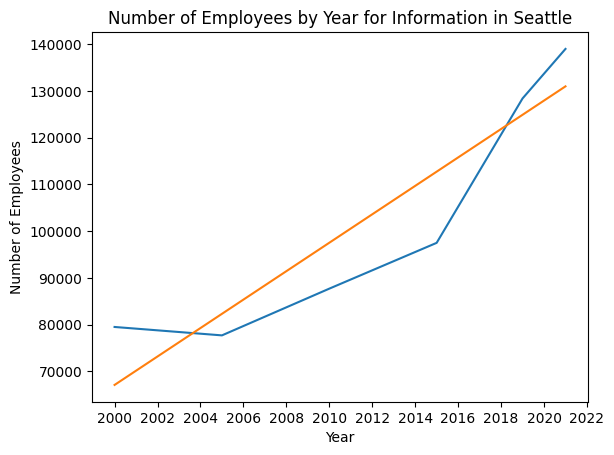

r^2: 0.2281492509608506


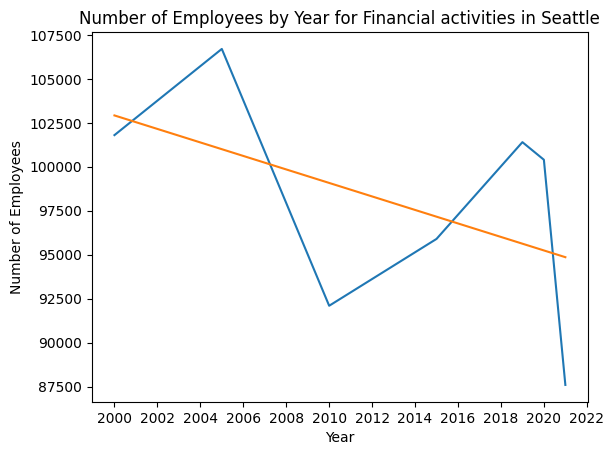

r^2: 0.8092168866908952


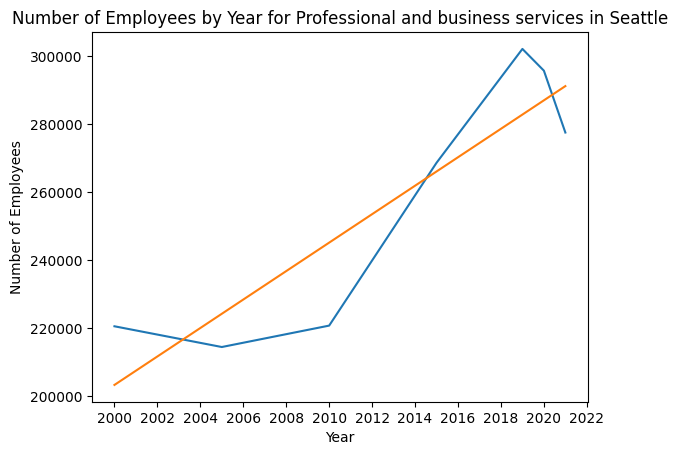

r^2: 0.6680790398249192


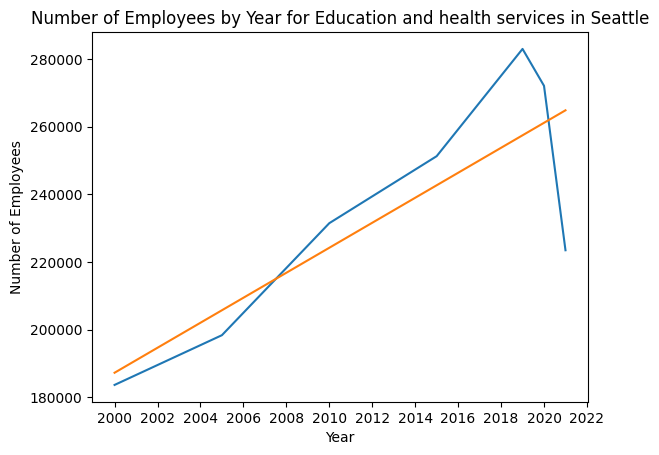

r^2: 0.06262801112599492


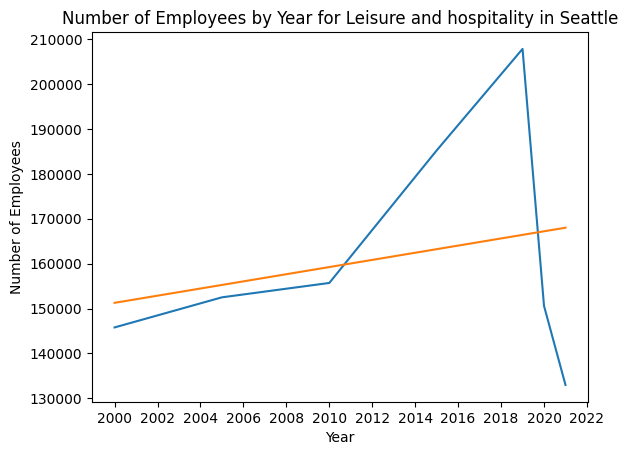

r^2: 0.34275478900620693


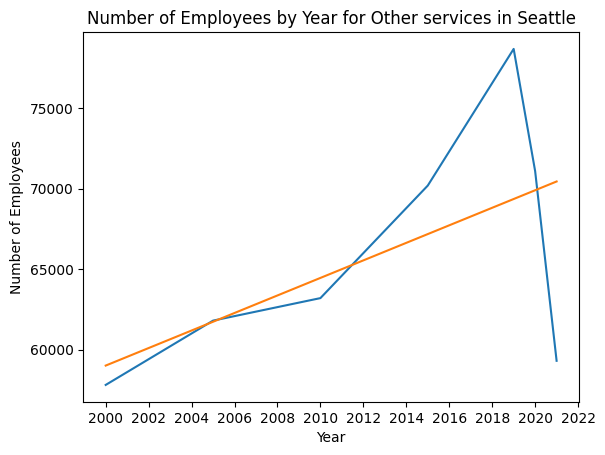

r^2: 0.005150591064690735


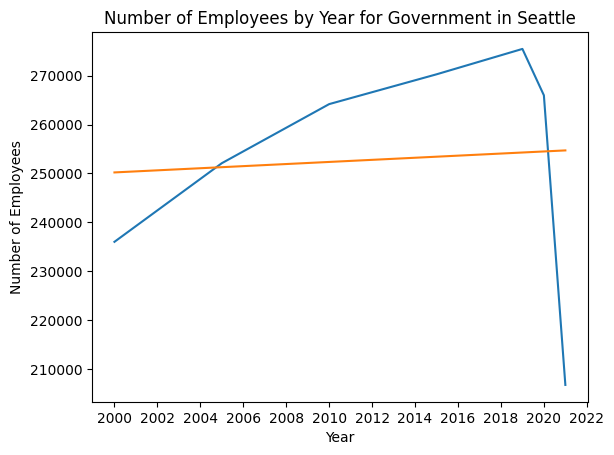

r^2: 0.6012518223300709


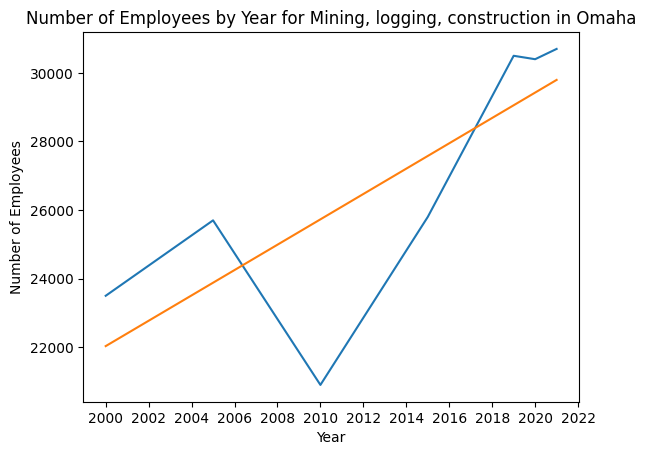

r^2: 0.10937909941876844


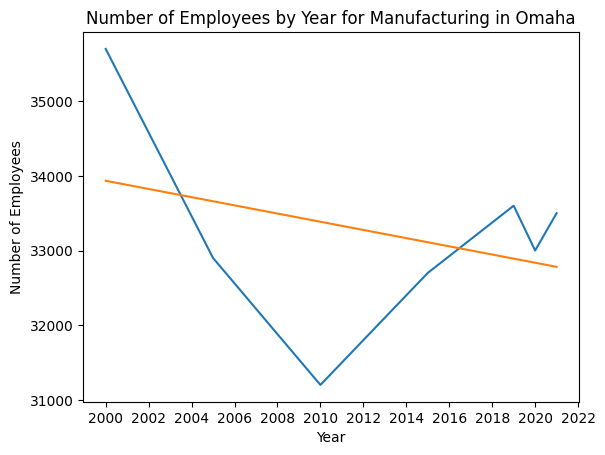

r^2: 0.6954043438888268


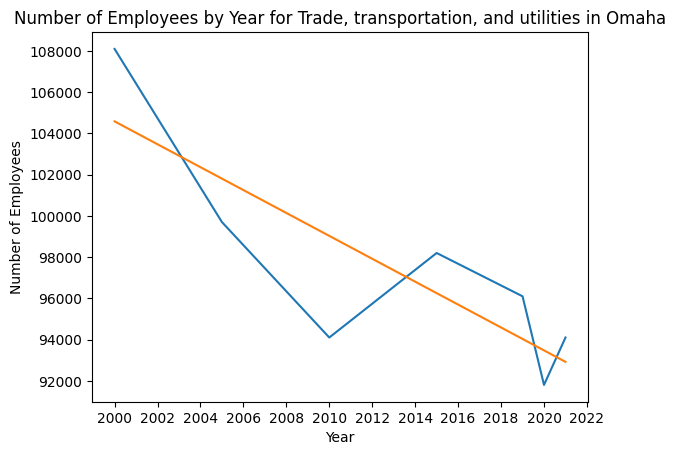

r^2: 0.9172297541172398


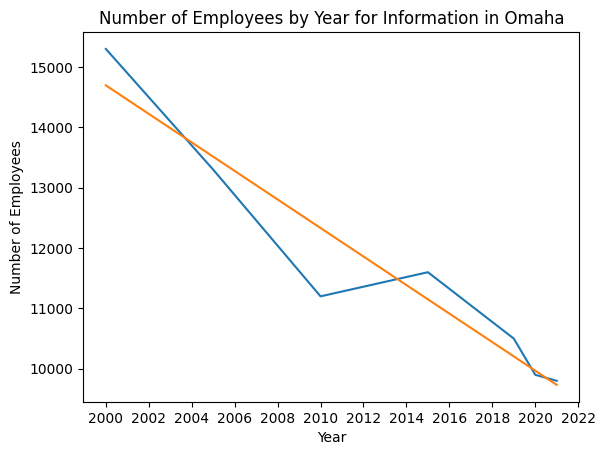

r^2: 0.9490504675349491


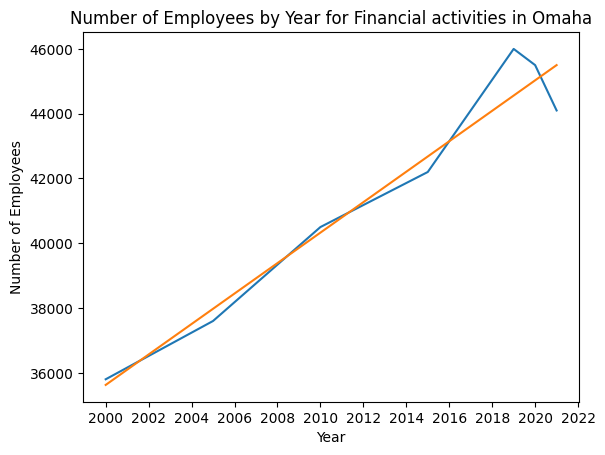

r^2: 0.834988665115352


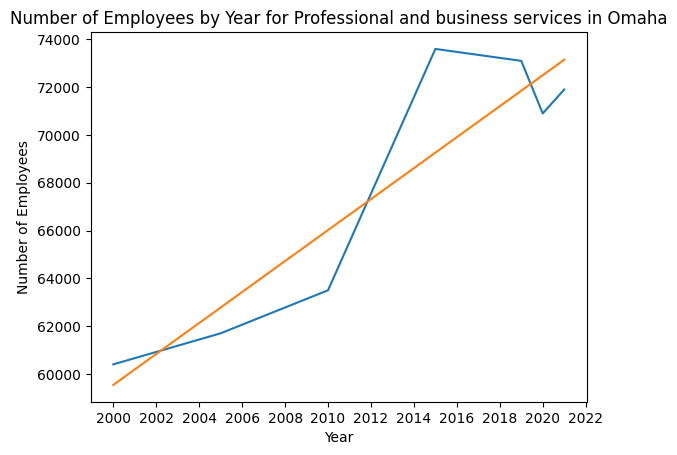

r^2: 0.9563730856079968


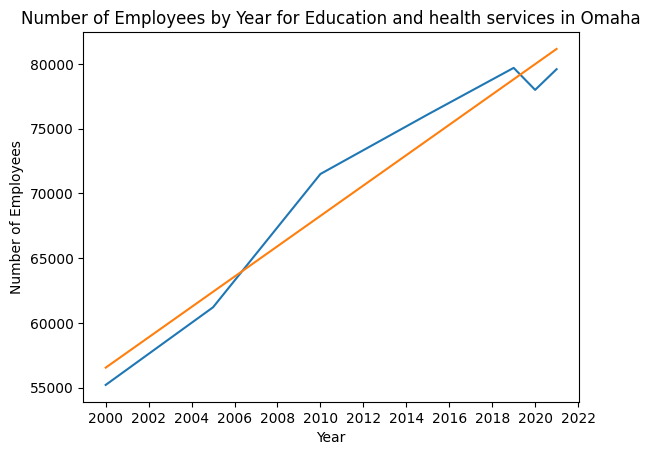

r^2: 0.4914289284821254


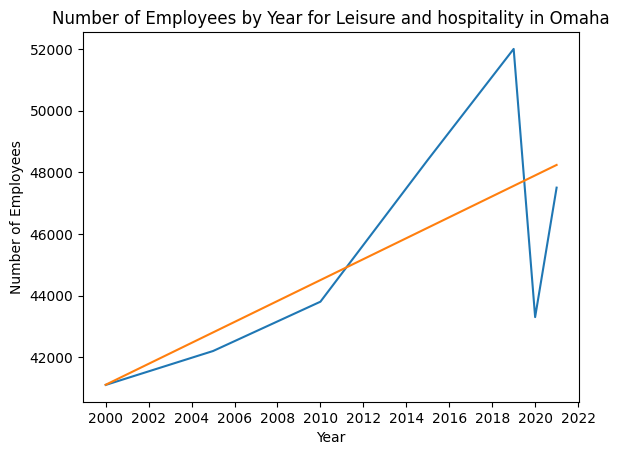

r^2: 0.7815140579008047


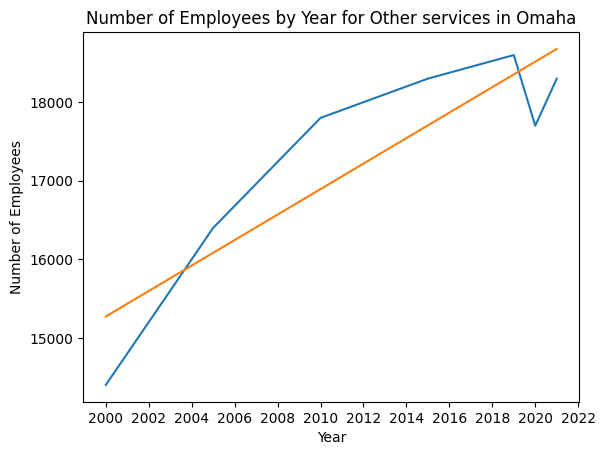

r^2: 0.7758664034890184


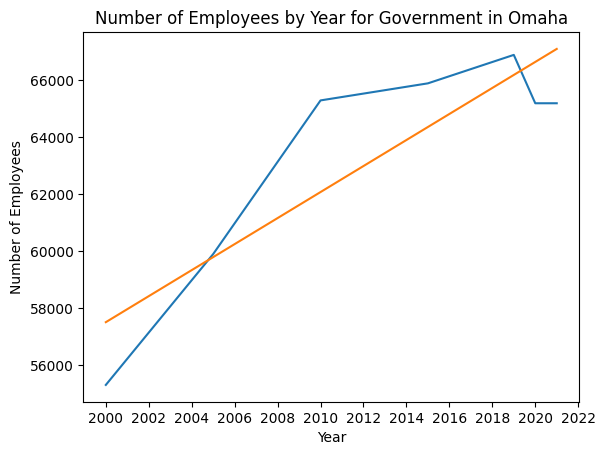

r^2: 0.10844987645271287


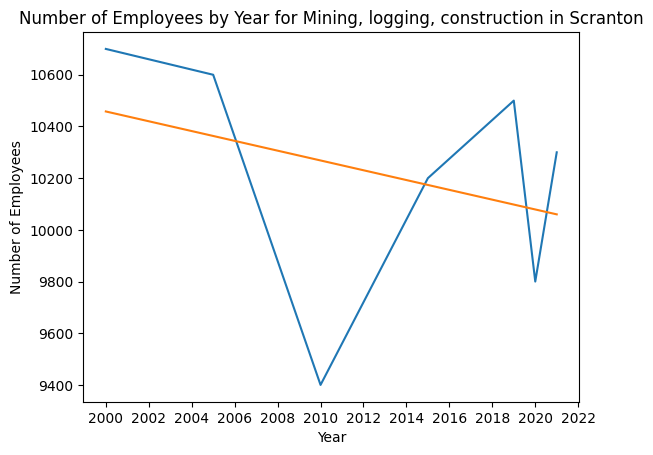

r^2: 0.7446813846482052


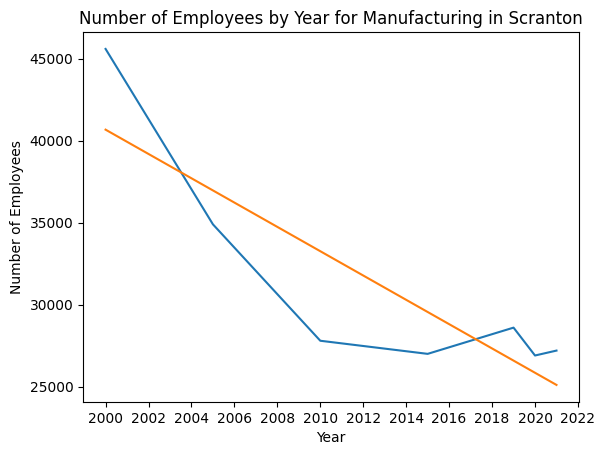

r^2: 0.9165026725498011


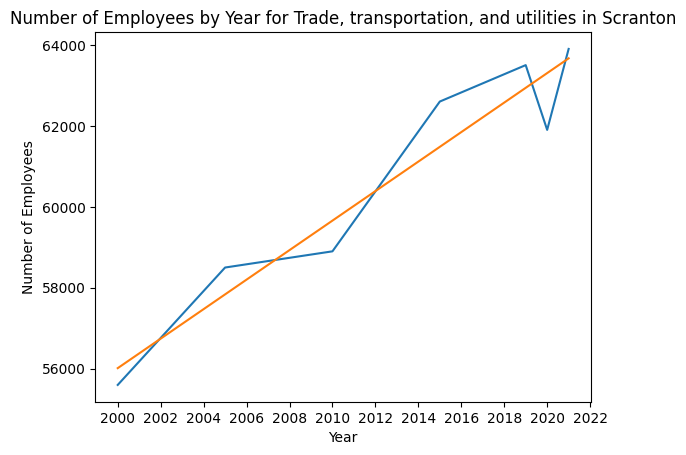

r^2: 0.9906689900053128


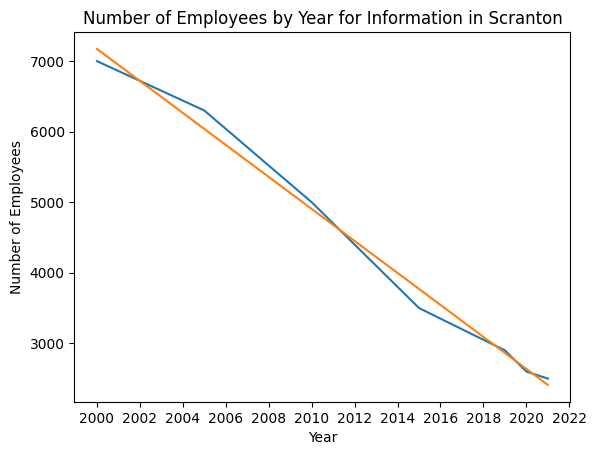

r^2: 0.24560168802222782


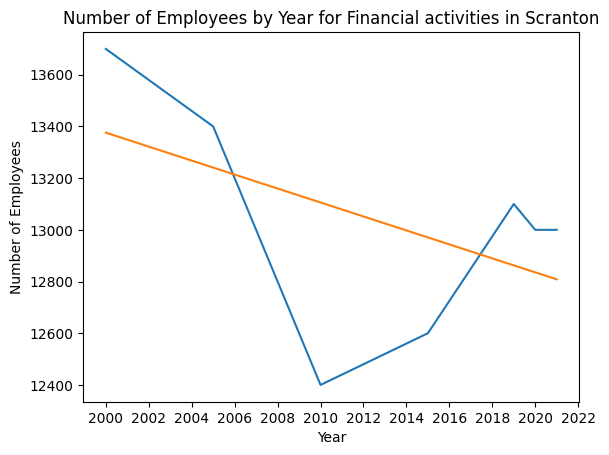

r^2: 0.4577371427229969


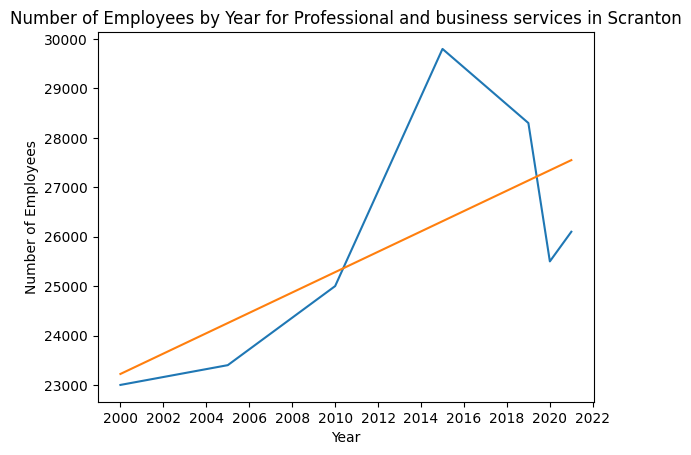

r^2: 0.5649309027084277


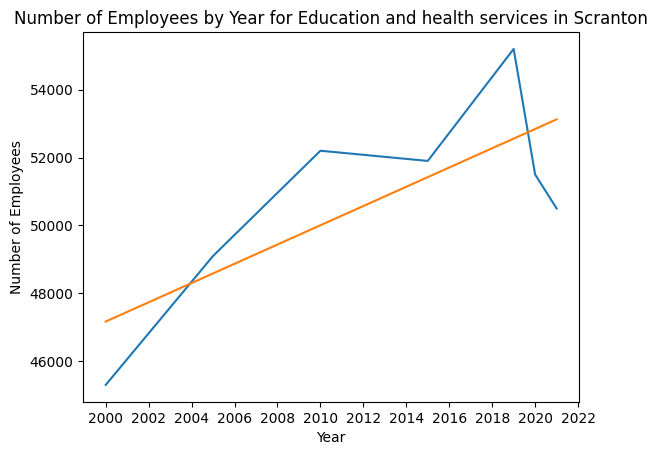

r^2: 0.00695332209681121


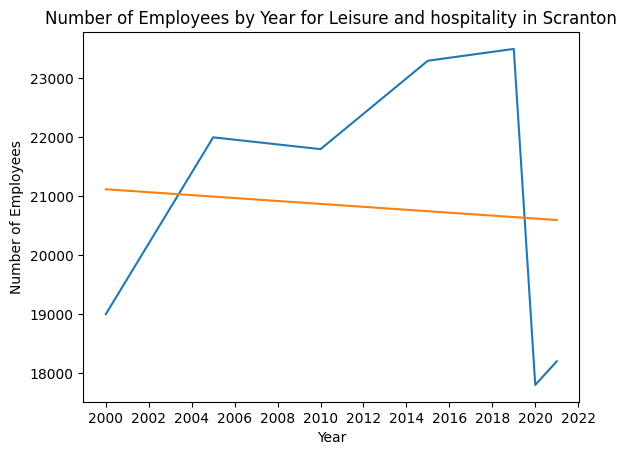

r^2: 0.7521762539351525


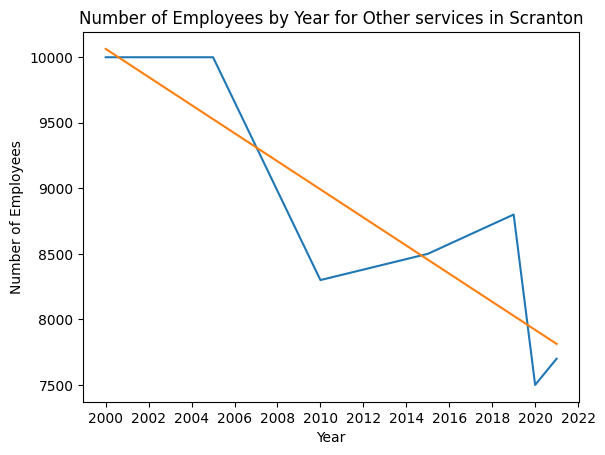

r^2: 0.7840594888104351


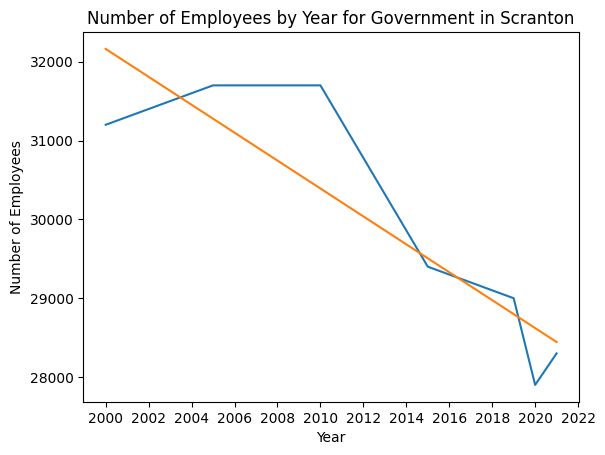

In [74]:
# plot with linear regression for each industry for each city in US
for city in numUSEmployeesByIndustryByCity:
    for industry in numUSEmployeesByIndustryByCity[city]:
        plt.plot(USIndustryYears, numUSEmployeesByIndustryByCity[city][industry])
        plt.xlabel('Year')
        plt.ylabel('Number of Employees')
        plt.title('Number of Employees by Year for ' + industry + ' in ' + city)

        # adjusts x ticks
        plt.xticks(np.arange(2000, 2027, 2))

        # plots linear regression
        m, b = np.polyfit(USIndustryYears, numUSEmployeesByIndustryByCity[city][industry], 1)
        plt.plot(USIndustryYears, m*USIndustryYears + b)

        # calculates r^2
        r2 = r2_score(numUSEmployeesByIndustryByCity[city][industry], m*USIndustryYears + b)
        print('r^2:', r2)

        plt.show()